# TS4: Estimadores espectrales

### Miranda Viceconte

## 1. Primeras nociones de estimación espectral.

### a. ¿Que es un estimador? 

Un estimador es una función o procedimiento que permite evaluar parámetros desconocidos de una señal —por ejemplo, su frecuencia o amplitud— a partir de sus muestras observadas. Esto es necesario porque, en la práctica, las señales suelen estar afectadas por ruido, errores de medición, o incluso por el propio proceso de cuantización digital, que introduce incertidumbre al representar valores continuos con un número finito de bits.

Analizar estimadores nos permite entender cuán precisos y confiables son los métodos que utilizamos para recuperar parámetros relevantes en señales reales. En este caso particular, nos enfocamos en dos parámetros fundamentales:

* La amplitud de una senoidal, que representa su energía.

* La frecuencia, que determina la periodicidad de la señal.

Estos parámetros son especialmente importantes en sistemas de comunicaciones, análisis espectral, y procesamiento biomédico, donde una señal ruidosa puede ocultar información relevante que sólo se puede recuperar con estimadores robustos

Una señal tipica tiene la siguiente forma: 
$$ x(n)= a_n* sin(\Omega_1*n= + n_a(n) $$
Donde: 
* $ a_1$: amplitud  de la senoidal 
* $\Omega_1 = \Omega_0 + f_r \cdot \frac{2\pi}{N} $: frecuencia angular
* $\Omega_0 = \frac{\pi}{2} $: frecuencia central
* $ f_r \sim \mathcal{U} \left( -\frac{1}{2}, \frac{1}{2} \right) $: variacion aleatoria
* $ n_a(n) \sim \mathcal{N}(0, \sigma^2) $: ruido blanco

El término $ f_r $ introduce una pequeña variación aleatoria en la frecuencia de cada realización de la señal. Esto simula incertidumbre en la frecuencia exacta. A su vez, el ruido blanco gaussiano $ n_a(n)$ simula perturbaciones típicas de sistemas reales, como interferencias o errores térmicos.

¿Por que usamos los estimadores y sobre que valores? 
En una señal senoidal pura, los dos parámetros que la caracterizan completamente son su frecuencia y su amplitud. En presencia de ruido, estos parámetros se ven distorsionados, por lo que es necesario estimarlos para recuperar la información original.

Por eso, se propone usar los siguientes estimadores: 

- **Estimador de amplitud**: 
$$ \hat{a}_1^{(i)} = \left| X_{iw}(\Omega_0) \right| = \left| \mathcal{F}\{x(n) \cdot w_i(n)\} \right| $$

- **Estimador espectral**
$$ \hat{\Omega}_1^{(i)} = \underset{\Omega}{\mathrm{arg\,max}} \left\{ \left| X_{iw}(\Omega) \right| \right\} $$

Siendo $w_i(n)$ una ventana cualesquiera. 


### b. Ventaneo y desparramo espectral

Cuando aplicamos una ventana a una señal en el dominio del tiempo, estamos realizando una multiplicación punto a punto entre la señal y la ventana. En el dominio de la frecuencia, esta operación se traduce en una convolución entre el espectro de la señal y el espectro de la ventana.

Esto implica que, al limitar la señal en el tiempo, estamos afectando su representación en frecuencia: la energía de la señal se redistribuye a lo largo del espectro, lo que genera lo que se conoce como desparramo espectral (leakage).

La resolución espectral está directamente relacionada con el ancho del lóbulo principal de la transformada de la ventana:

* Una ventana más ancha (en el tiempo) permite una mejor resolución en frecuencia, ya que su lóbulo principal es más angosto. Sin embargo, esto suele generar lóbulos laterales más altos, lo que produce mayor desparramo espectral.

* Una ventana más angosta produce lóbulos laterales más bajos (menos leakage), pero el lóbulo principal es más ancho, lo que implica peor resolución espectral.

En resumen, existe un compromiso entre resolución espectral y desparramo: no se pueden optimizar ambos aspectos al mismo tiempo. Este fenómeno afecta directamente la precisión de los estimadores, ya que la energía de una frecuencia puede “fugarse” hacia otras, dificultando la estimación exacta de parámetros como la frecuencia o amplitud de la señal.

Por lo tanto, la resolución espectral y el desparramo espectral están estrechamente relacionados con la forma de la ventana que aplicamos. Elegir la ventana correcta es fundamental para obtener estimaciones precisas, ya que puede reducir el desparramo mientras mantiene una buena resolución en la frecuencia.

Este proceso de "desplazar" la ventana y tomar las muestras según la resolución espectral tiene el objetivo de mejorar nuestra capacidad de identificar características importantes de la señal, como su frecuencia y amplitud, a pesar del ruido o las limitaciones de la cuantización.

Se analizarán diferentes tipos de ventanas:

- **Rectangular**
La ventana rectangular es la más simple y se utiliza cuando no se aplica ninguna ventana o "recorte" a la señal. Esta ventana toma la señal tal como es y no la modifica. Tiene una alta resolucion, pero induce mucho desparramo especral.

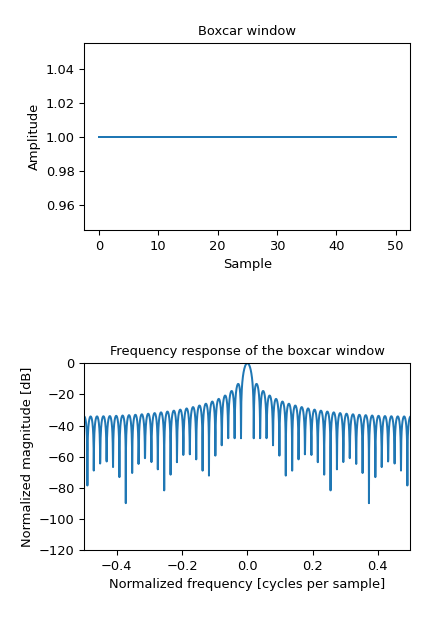

- **BartHannin**
La ventana Bart-Hann es una mezcla entre la ventana triangular y la Blackman-Harris. Es suave en sus bordes y tiene una caída más gradual que la rectangular, similar a la Blackman-Harris, pero con una forma más simple. El desparramo espectral no se reduce tanto como con otras ventanas y una resolucion espectral media. 

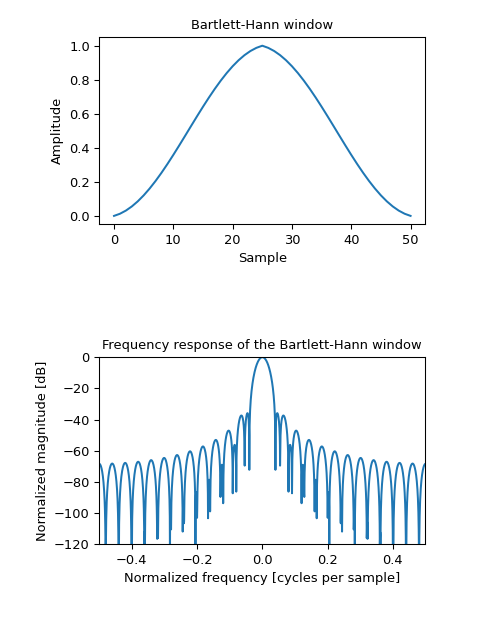 

- **Flattop**
La ventana flattop se caracteriza por tener una forma que trata de aplanar el máximo de la señal en el centro, reduciendo la influencia de las colas de la ventana. Está diseñada para minimizar los errores en la estimación de la amplitud, ya que la forma "plana" reduce los efectos del desparramo espectral.
 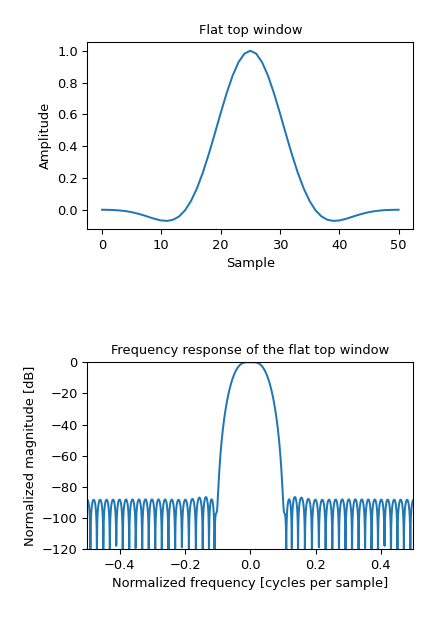 

- **Blackman-Harris**
La ventana Blackman-Harris es una ventana de forma más suave que se utiliza comúnmente para reducir el desparramo espectral. Su forma es más compleja que la rectangular, con una caída más gradual hacia los bordes, lo que ayuda a disminuir los lóbulos laterales en el dominio de la frecuencia.
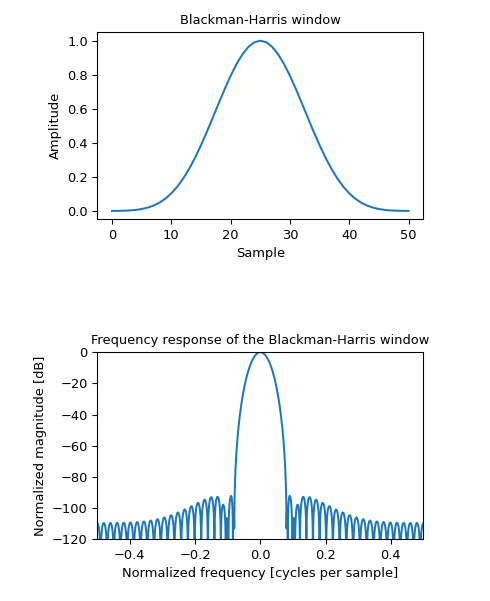 


### 2. Simulaciones/Código 

In [2]:
import numpy as np
from scipy import signal
from scipy.fft import fft, fftshift
import matplotlib.pyplot as plt

In [3]:
#%% Definicion de funciones

def estimador_omega(f_t, N, df):
    FT_abs = np.abs(f_t[:N//2, :])
    P_est = (1/N) * (FT_abs ** 2)
    omega_est = np.argmax(P_est, axis=0) * df
    return omega_est

In [4]:
#%% Datos de la simulacion, definicion de constantes

Np=1000 
SNRs = [3, 10]
R=200 #numero de muestras
a1= np.sqrt(2) #Amplitud de la señal, eligiendo esta ya estoy normalizando la señal. Ya no hace falta dividirla por la desviacion estandar
fs = 1000 # frecuencia de muestreo (Hz) conviene numero entero conocido 
N = 1000 # cantidad de muestras
N2= 10*N
ts = 1/fs  # tiempo de muestreo
df= fs/N #resolucion espectral 
df_pp=fs/N2
omega0= fs/4

In [5]:
#%% Generacion de la señal X

# Defino S

# Grilla de sampleo temporal ---> DISRETIZACION DEL TIEMPO (muestreo)
tt = np.linspace(0, (N-1)*ts, N).reshape((1000, 1))  #[1000x1]
tt= np.tile(tt, (1, R)) #Repetidor [100x200]

# Grilla sampleo frecuencial
ff= np.linspace(0, (N-1)*df, N) #.reshape(1, 1000) # [1,1000]
fr = np.random.uniform(-1/2, 1/2, size=(1,R)) # [1, 200]

omega1= omega0 + fr* (df)

S= a1*np.sin(2*np.pi*omega1*tt)

# Defino la ventana de Barthann
M=N
w= signal.windows.barthann(M).reshape((Np, 1)) #[1000, 1]

# Defino la ventana de 
w2= signal.windows.blackmanharris(M).reshape((Np, 1)) #[1000, 1]

# Defino la ventana de 
w3= signal.windows.flattop(M).reshape((Np, 1)) #[1000, 1]

#Grilla de frecuencias  
freqs = np.fft.fftfreq(N, d=ts)

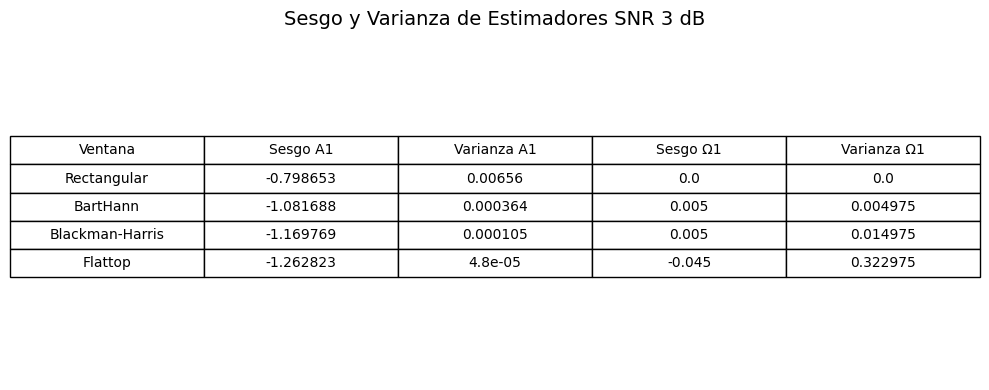

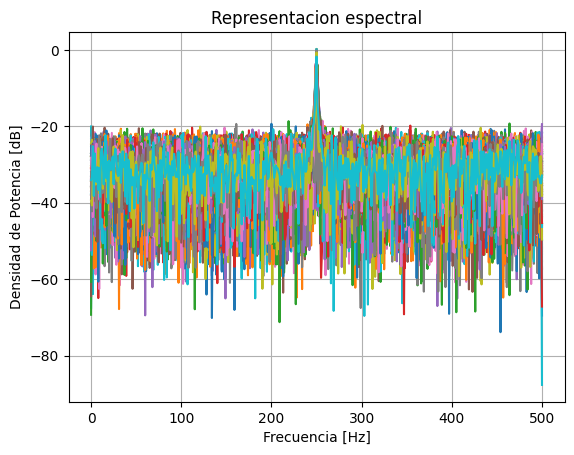

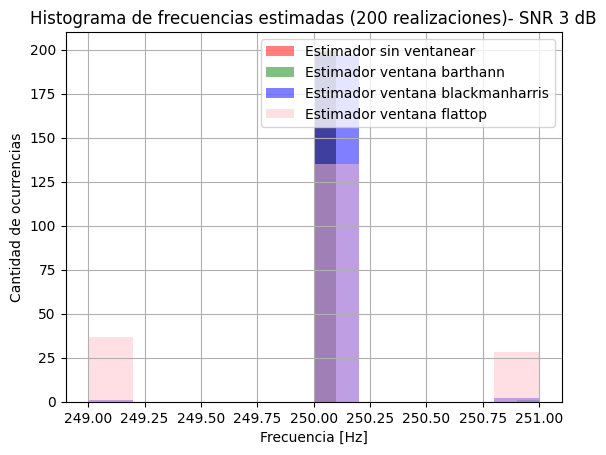

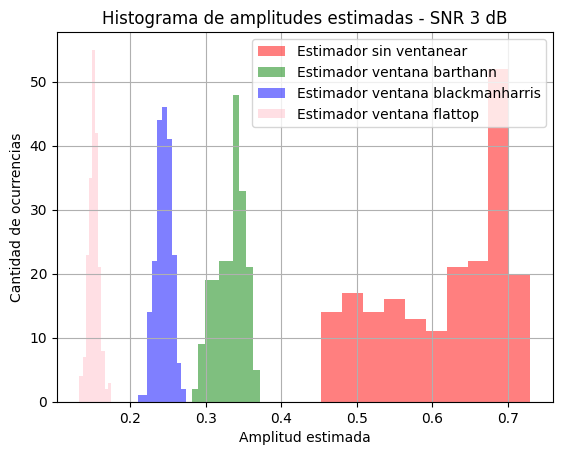

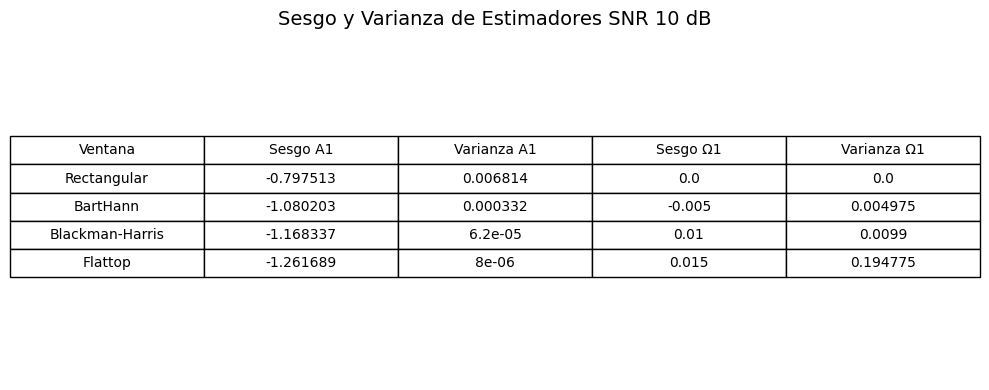

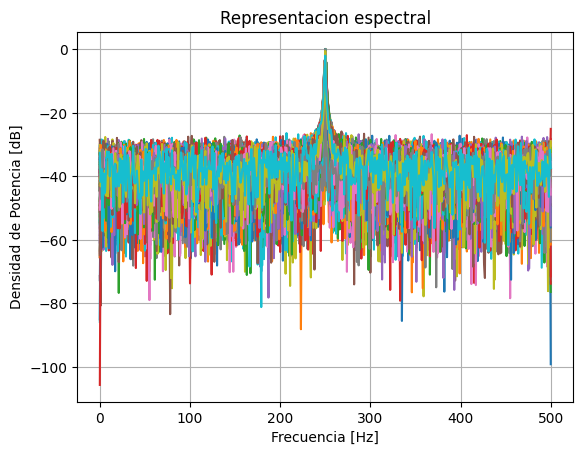

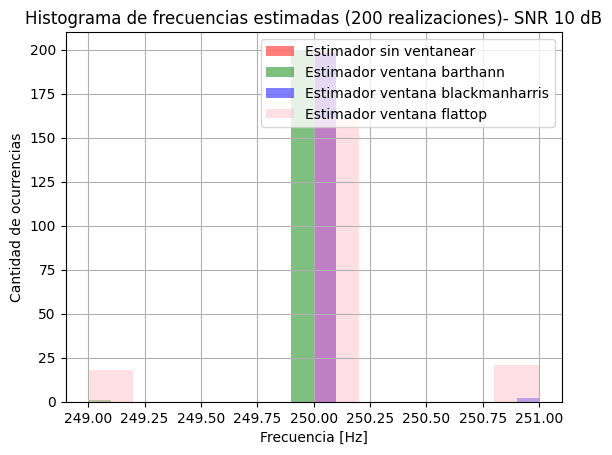

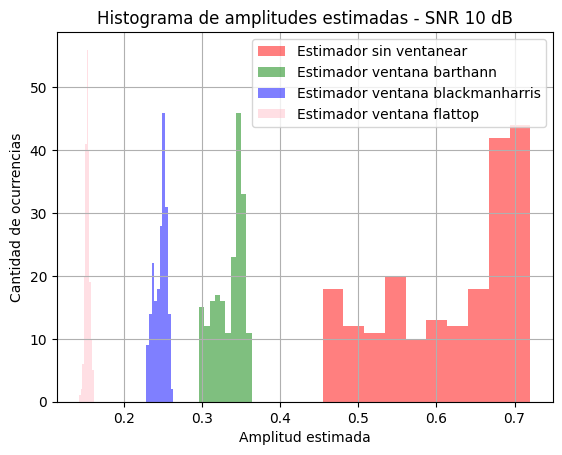

In [6]:
for snr_db in SNRs:
    # #%% Datos del ruido
    
    # # Señal analogica --> Lo saco de SNR
    pot_ruido_analog = 10**(- snr_db / 10)
    sigma= np.sqrt(pot_ruido_analog)
    # #Generacion de ruido analogico 
    nn = np.random.normal(0, sigma, (Np, R)) 
     
    # Señal final 
    xx = S + nn  # [1000x200]
    
    # Multiplicacion 
    xw= xx * w  # [1000, 200] * [1000, 1] → [1000, 200]
    xw2= xx * w2 
    xw3= xx * w3
    
    # Tranformada y estimadores 

    # Calculo la transformada sin zero padding 
    ft_xx = 1/N * np.fft.fft(xx,  axis=0) 
    ft_xw = 1/N * np.fft.fft(xw, axis=0) 
    ft_xw2 = 1/N * np.fft.fft(xw2, axis=0)
    ft_xw3 = 1/N * np.fft.fft(xw3, axis=0) 
    
    
    # Calculo la transformada con zero padding 
    ft_xx_pp = 1/N * np.fft.fft(xx,n=N2, axis=0) 
    ft_xw_pp = 1/N * np.fft.fft(xw, n=N2, axis=0) 
    ft_xw2_pp = 1/N * np.fft.fft(xw2, n=N2, axis=0)
    ft_xw3_pp = 1/N * np.fft.fft(xw3, n=N2, axis=0)
    
    # Calculo el estimador de amplitud (a1=mod(ft_xw))
    
    #Estimador---> en N/4 de la matriz xx  es 
    # # Estimador sin ventanear
    a1_est= np.abs(ft_xx[N//4, :])  # [1000, 200] // Division entera   
    
    # # Estimador ventana barthann
    a1_est2= np.abs(ft_xw[N//4, : ])  # [1000, 200]
    
    # # Estimador ventana blackmanharris
    a1_est3= np.abs(ft_xw2[N//4, :])  # [1000, 200]
    
    # # Estimador  ventana flattop
    a1_est4= np.abs(ft_xw3[N//4, :])  # [1000, 200]
    
    # BONUS – SIN ZERO PADDING
    omega1_est = estimador_omega(ft_xx, N, df)
    omega2_est = estimador_omega(ft_xw, N, df)
    omega3_est = estimador_omega(ft_xw2, N, df)
    omega4_est = estimador_omega(ft_xw3, N, df)
    
    #Calculo el sesgo y la varianza de estimador de amplitud
    valor_real=a1
    esperanza_a1_xx= np.mean(a1_est)
    esperanza_a1_xw= np.mean(a1_est2)
    esperanza_a1_xw2=np.mean(a1_est3)
    esperanza_a1_xw3= np.mean(a1_est4)
    
    sesgo_a1_xx= esperanza_a1_xx-valor_real
    sesgo_a1_xw= esperanza_a1_xw-valor_real
    sesgo_a1_xw2=esperanza_a1_xw2-valor_real
    sesgo_a1_xw3= esperanza_a1_xw3-valor_real
    
    varianza_a1_xx= np.var(a1_est)
    varianza_a1_xw=np.var(a1_est2)
    varianza_a1_xw2=np.var(a1_est3)
    varianza_a1_xw3=np.var(a1_est4)
    
    #Calculo el sesgo y la varianza de estimador de frecuencia espectral
    
    valor_real2= omega0 

    esperanza_o_xx= np.mean(omega1_est)
    esperanza_o_xw= np.mean(omega2_est)
    esperanza_o_xw2=np.mean(omega3_est)
    esperanza_o_xw3= np.mean(omega4_est)
    
    sesgo_xx_o= esperanza_o_xx-valor_real2
    sesgo_xw_o= esperanza_o_xw-valor_real2
    sesgo_xw2_o=esperanza_o_xw2-valor_real2
    sesgo_xw3_o= esperanza_o_xw3-valor_real2
    
    varianza_xx_o= np.var(omega1_est)
    varianza_xw_o=np.var(omega2_est)
    varianza_xw2_o=np.var(omega3_est)
    varianza_xw3_o=np.var(omega4_est)
    

    nombres_ventanas = ['Rectangular', 'BartHann', 'Blackman-Harris', 'Flattop']
    sesgos_amplitud = [sesgo_a1_xx, sesgo_a1_xw, sesgo_a1_xw2, sesgo_a1_xw3]
    varianzas_amplitud = [varianza_a1_xx, varianza_a1_xw, varianza_a1_xw2, varianza_a1_xw3]
    sesgos_frecuencia = [sesgo_xx_o, sesgo_xw_o, sesgo_xw2_o, sesgo_xw3_o]
    varianzas_frecuencia = [varianza_xx_o, varianza_xw_o, varianza_xw2_o, varianza_xw3_o]
    
    # Armar los datos como una lista de filas
    tabla_datos = []
    for i in range(len(nombres_ventanas)):
        fila = [
            nombres_ventanas[i],
            round(sesgos_amplitud[i], 6),
            round(varianzas_amplitud[i], 6),
            round(sesgos_frecuencia[i], 6),
            round(varianzas_frecuencia[i], 6)
        ]
        tabla_datos.append(fila)
    
    # Mostrar la tabla como imagen
    fig, ax = plt.subplots(figsize=(10, 2 + len(tabla_datos)*0.5))
    ax.axis('off')
    tabla = ax.table(
        cellText=tabla_datos,
        colLabels=['Ventana', 'Sesgo A1', 'Varianza A1', 'Sesgo Ω1', 'Varianza Ω1'],
        loc='center',
        cellLoc='center',
        colLoc='center'
    )
    tabla.auto_set_font_size(False)
    tabla.set_fontsize(10)
    tabla.scale(1, 1.5)
    
    plt.title('Sesgo y Varianza de Estimadores SNR {} dB'.format(snr_db), fontsize=14)
    plt.tight_layout()
    plt.show()

    ###HISTOGRAMA###
    plt.figure()
    bfrec= ff <= fs / 2
    plt.plot(ff[bfrec], 10 * np.log10(2 * np.abs(ft_xx[bfrec])**2))
    plt.title('Representacion espectral' )
    plt.ylabel('Densidad de Potencia [dB]')
    plt.xlabel('Frecuencia [Hz]')
    plt.grid(True)
    
    plt.figure()
    plt.hist(omega1_est, bins=10, color='red', alpha=0.5, label="Estimador sin ventanear")
    plt.hist(omega2_est, bins=10, color='green',alpha=0.5, label="Estimador ventana barthann")
    plt.hist(omega3_est, bins=10, color='blue',alpha=0.5, label="Estimador ventana blackmanharris")
    plt.hist(omega4_est, bins=10, color='pink', alpha=0.5, label="Estimador ventana flattop")
    plt.title("Histograma de frecuencias estimadas (200 realizaciones)- SNR {} dB".format(snr_db))
    plt.xlabel("Frecuencia [Hz]")
    plt.ylabel("Cantidad de ocurrencias")
    plt.grid(True)
    plt.legend()
    
    plt.figure()
    plt.hist(a1_est, bins=10, color='red', alpha=0.5, label="Estimador sin ventanear") #Bins: resolucion espectral del histograma; conteo relativo. ANCHURA de los valores.
    plt.hist(a1_est2, bins=10, color='green', alpha=0.5, label="Estimador ventana barthann")
    plt.hist(a1_est3, bins=10, color='blue', alpha=0.5, label="Estimador ventana blackmanharris")
    plt.hist(a1_est4, bins=10, color='pink', alpha=0.5, label="Estimador ventana flattop")
    plt.legend()

    plt.title("Histograma de amplitudes estimadas - SNR {} dB".format(snr_db))
    plt.xlabel("Amplitud estimada")
    plt.ylabel("Cantidad de ocurrencias")
    plt.grid(True)
    
plt.show()
